In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> Gene Selection </h1>
<h3 align="center"> Christine Zhang </h3>

----

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
%matplotlib inline

### Import Files and Prep Data

---

In [2]:
ccl_pd = pd.read_csv('datasets_498/masterccleids.csv', header=None, sep =",")
ccl = ccl_pd.as_matrix()
ccl_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,497
0,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286


In [3]:
auc_trans_pd = pd.read_csv('datasets_498/auc.csv', names = ccl[0], sep =",")
auc_trans_pd.head()

,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
0,2.473,2.142,3.38,3.374,3.123,3.779,3.471,2.625,4.677,2.751,...,2.469,3.071,5.351,3.929,3.912,4.913,3.755,1.712,4.61,5.46


In [4]:
auc_pd = auc_trans_pd.transpose()
auc = auc_pd.as_matrix()
auc_pd.head()

,0
3,2.473
7,2.142
10,3.380
15,3.374
16,3.123


In [5]:
geneexp_header_pd = pd.read_csv('datasets_498/geneexp_entrezid.csv', header = None, sep =",")
geneexp_header = geneexp_header_pd.as_matrix()
print (geneexp_header_pd.shape)
geneexp_header_pd.head()

(18543, 1)


,0
0,100009676
1,10000
2,10001
3,10002
4,10003


In [6]:
geneexp_values_pd = pd.read_csv('datasets_498/geneexp_values.csv', names = ccl[0], sep =",")
geneexp_values = geneexp_values_pd.as_matrix()
print (geneexp_values_pd.shape)
geneexp_values_pd.set_index(geneexp_header.flatten(), inplace=True)
geneexp_values_pd.head()

(18543, 498)


,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
100009676,5.979812,6.079415,5.373842,6.025009,5.444892,5.838828,6.044784,6.110702,5.957453,5.353808,...,5.914540,5.449070,5.509434,6.467376,5.225789,5.056441,5.648520,5.431827,5.229068,5.173519
10000,6.595651,4.521625,6.631749,7.510764,7.544216,7.328450,8.240295,7.339923,7.133862,8.464749,...,8.165614,7.180522,5.359294,6.755762,6.430797,6.566739,6.907085,6.997253,5.847498,4.367224
10001,9.663415,8.845639,10.001350,9.289334,8.715909,8.410834,9.613478,9.227492,8.561879,8.308694,...,8.862251,8.676574,9.098502,9.503690,9.022547,9.840038,9.083045,8.351265,9.277778,9.036209
10002,4.040661,3.768181,3.610522,3.685390,4.173643,3.776557,4.021159,3.547729,3.898854,3.589157,...,3.709869,3.704990,4.277868,4.014417,4.223398,3.986096,4.068887,3.556416,4.645180,4.055940
10003,4.159523,4.044822,4.242035,3.656942,3.663081,4.047007,4.597602,4.252498,3.742255,3.612253,...,3.764959,4.515754,3.751250,3.879979,3.825131,3.752928,3.977737,3.786633,3.665520,3.903062


In [7]:
mutation_header_pd = pd.read_csv('datasets_498/mutation_hugo.csv', header = None, sep = " ")
mutation_header = mutation_header_pd.as_matrix()
print (mutation_header_pd.shape)
mutation_header_pd.head()

(3235, 1)


,0
0,AAK1'
1,'AAK1_p.Q541'
2,'AAK1_p.Q541indel2>Q'
3,AATK'
4,ABCA3'


In [8]:
mutation_values_pd = pd.read_csv('datasets_498/mutation_value.csv', names = ccl[0], sep =",")
mutation_values = mutation_values_pd.as_matrix()
print (mutation_values_pd.shape)
mutation_values_pd = mutation_values_pd.astype('float64')
# mutation_values_pd.set_index(mutation_header, inplace=True)
mutation_values_pd.head()

(3235, 498)


,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
copynum_header_pd = pd.read_csv('datasets_498/copynum_entrezid.csv', header = None, sep =",")
copynum_header = copynum_header_pd.as_matrix()
print (copynum_header_pd.shape)
copynum_header_pd.head()

(23174, 1)


,0
0,1
1,503538
2,29974
3,2
4,144571


In [10]:
copynum_values_pd = pd.read_csv('datasets_498/copynum_values.csv', names = ccl[0], sep =",")
copynum_values = copynum_values_pd.as_matrix()
print (np.shape(copynum_values_pd))
copynum_values_pd.set_index(copynum_header.flatten(), inplace=True)
copynum_values_pd.head()

(23174, 498)


,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
1,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
503538,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
29974,-0.4928,-0.0025,-0.0522,-0.3050,0.0436,0.1438,-0.3561,-0.1415,-0.3390,-0.1974,...,-0.1827,-0.1941,0.2785,0.0867,0.1208,0.2966,-0.9912,-0.1204,0.0398,0.1423
2,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203
144571,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203


### Naive Testing

---

In [11]:
print (np.shape(copynum_values_pd))
print (np.shape(geneexp_values_pd))

(23174, 498)
(18543, 498)


In [12]:
exp_cn_trans_pd = pd.concat([copynum_values_pd, geneexp_values_pd])
exp_cn_trans = exp_cn_trans_pd.as_matrix()
print (exp_cn_trans_pd.shape)
exp_cn_trans_pd.head()

(41717, 498)


,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
1,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
503538,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
29974,-0.4928,-0.0025,-0.0522,-0.3050,0.0436,0.1438,-0.3561,-0.1415,-0.3390,-0.1974,...,-0.1827,-0.1941,0.2785,0.0867,0.1208,0.2966,-0.9912,-0.1204,0.0398,0.1423
2,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203
144571,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203


In [13]:
exp_cn_pd = exp_cn_trans_pd.transpose()
exp_cn = exp_cn_pd.as_matrix()

In [14]:
linreg = LinearRegression()
svr_rbf = SVR(kernel = "rbf")
svr_lin = SVR(kernel = "linear")
rf = RandomForestRegressor()
lasso = linear_model.Lasso(alpha=0.1)
net = linear_model.ElasticNet(alpha=0.1)

# test naive models
def test_model_pca (model):
    clf = model
    clf.fit(x_train_pca, y_train)
    y_pred = clf.predict(x_test_pca)
    r2 = clf.score(x_test_pca, y_test)
    return y_pred, r2

def test_model (model):
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2 = clf.score(x_test, y_test)
    return y_pred, r2

def draw_plot (ax, y_pred, title, y_score):
    y_pred = y_pred.flatten()
    ax.scatter(y_pred, y_test)
    ax.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)))
    ax.set_title("%s r2 accuracy: %s" %(title, round(y_score, 3)))
    ax.set_xlabel("Predicted AUC")
    ax.set_ylabel("Actual AUC")
    return plt

In [48]:
x_train, x_test, y_train, y_test = train_test_split(exp_cn, auc, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()
pca = PCA(n_components=50)
pca.fit(x_train)    
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print ("Amount of Variance explained by each component: ", pca.explained_variance_ratio_)
print ("Total Variance Captured", np.sum(pca.explained_variance_ratio_))

Amount of Variance explained by each component:  [0.09721839 0.05087327 0.0288741  0.02571524 0.02219551 0.01830684
 0.01751177 0.01514744 0.01359786 0.01199553 0.01136548 0.01068618
 0.01011816 0.00974544 0.00964189 0.00884199 0.0087756  0.0085255
 0.00828049 0.0078941  0.0076116  0.00752301 0.00727106 0.00686523
 0.00675522 0.00642831 0.00632874 0.00605088 0.00593486 0.00579168
 0.00572375 0.00543515 0.00533694 0.00524492 0.00513386 0.005111
 0.00497227 0.00488852 0.00477415 0.00464774 0.00455243 0.00446306
 0.00432274 0.00423116 0.00415186 0.0041008  0.0040073  0.00383881
 0.00383163 0.00375481]
Total Variance Captured 0.5543942743694696


In [51]:
tuning_pca = np.concatenate((x_train_pca, x_test_pca))
print (np.shape(tuning_pca))

(498, 50)


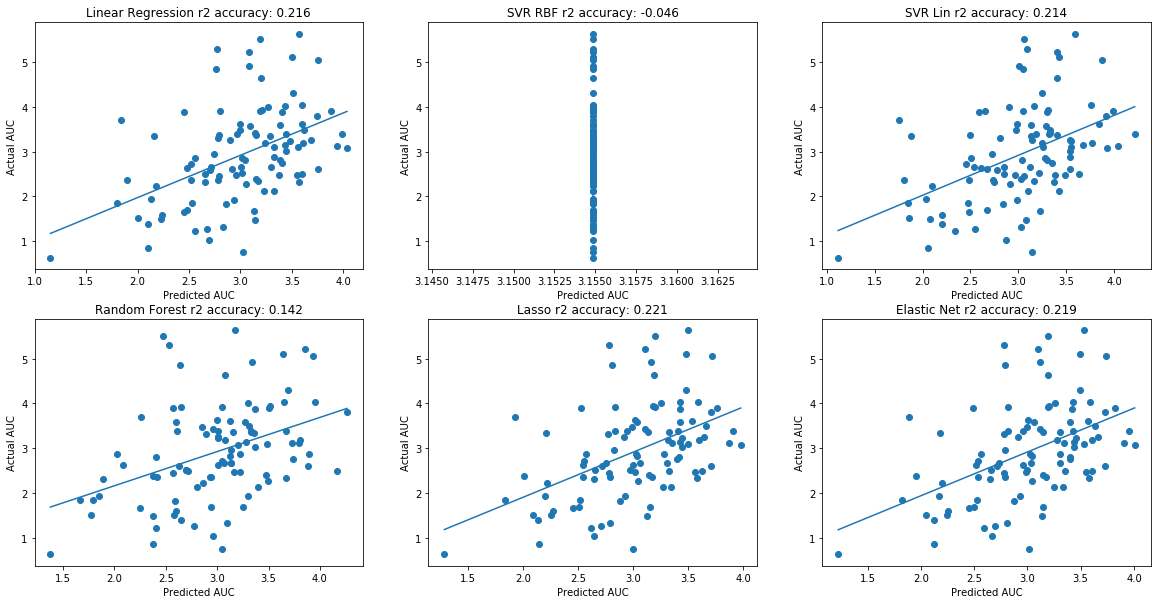

In [52]:
# calculated r_2 values
y_pred_linreg_PCA, r2_linreg_PCA = test_model_pca (linreg)
y_pred_svr_rbf_PCA, r2_svr_rbf_PCA = test_model_pca (svr_rbf)
y_pred_svr_lin_PCA, r2_svr_lin_PCA = test_model_pca (svr_lin)
y_pred_rf_PCA, r2_rf_PCA = test_model_pca (rf)
y_pred_lasso_PCA, r2_lasso_PCA = test_model_pca (lasso)
y_pred_net_PCA, r2_net_PCA = test_model_pca (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg_PCA, "Linear Regression", r2_linreg_PCA)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf_PCA, "SVR RBF", r2_svr_rbf_PCA)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin_PCA, "SVR Lin", r2_svr_lin_PCA)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf_PCA, "Random Forest", r2_rf_PCA)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_PCA, "Lasso", r2_lasso_PCA)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_PCA, "Elastic Net", r2_net_PCA)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(exp_cn, auc, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

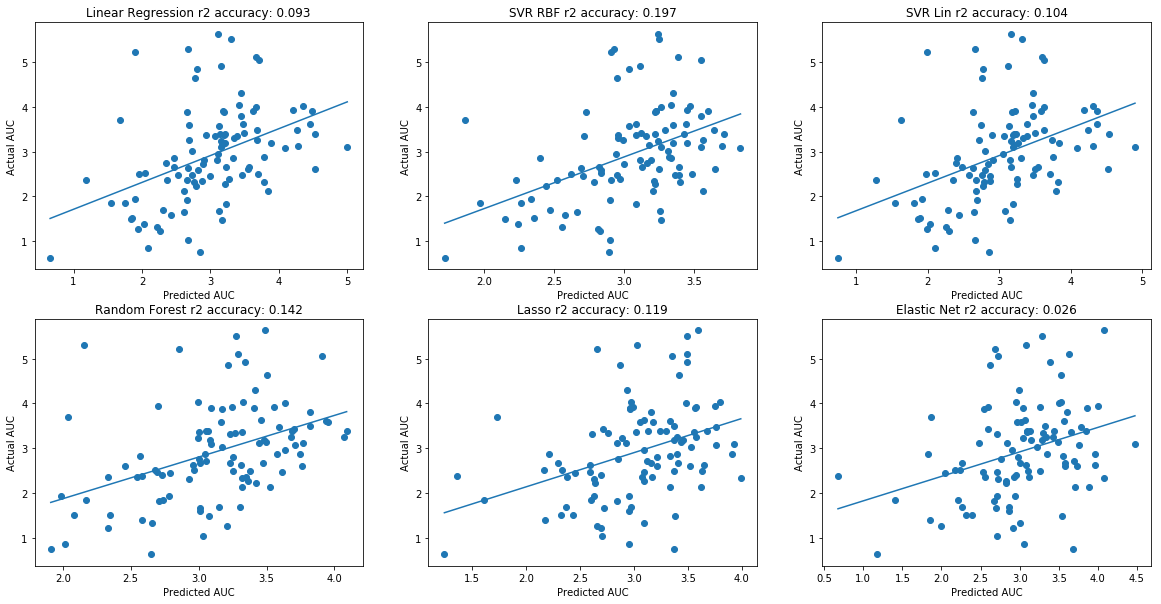

In [54]:
# calculated r_2 values
y_pred_linreg, r2_linreg = test_model (linreg)
y_pred_svr_rbf, r2_svr_rbf = test_model (svr_rbf)
y_pred_svr_lin, r2_svr_lin = test_model (svr_lin)
y_pred_rf, r2_rf = test_model (rf)
y_pred_lasso, r2_lasso = test_model (lasso)
y_pred_net, r2_net = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg, "Linear Regression", r2_linreg)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf, "SVR RBF", r2_svr_rbf)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin, "SVR Lin", r2_svr_lin)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf, "Random Forest", r2_rf)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso, "Lasso", r2_lasso)
ax[1,2] = draw_plot (ax[1,2], y_pred_net, "Elastic Net", r2_net)

In [97]:
score_df = pd.DataFrame({'Linear Regression': [r2_linreg, r2_linreg_PCA],
                         'SVM RBF': [r2_svr_rbf, r2_svr_rbf_PCA],
                         'SVM Linear': [r2_svr_lin, r2_svr_lin_PCA],
                         'Random Forest': [r2_rf,r2_rf_PCA],
                         'Lasso': [r2_lasso, r2_lasso_PCA],
                         'Net': [r2_net, r2_net_PCA]}, 
                       index=["All", "PCA"])
score_df

,Lasso,Linear Regression,Net,Random Forest,SVM Linear,SVM RBF
All,0.119339,0.093567,0.025970,0.215765,0.104139,0.197470
PCA,0.217126,0.214252,0.216543,0.133938,0.217092,-0.046081


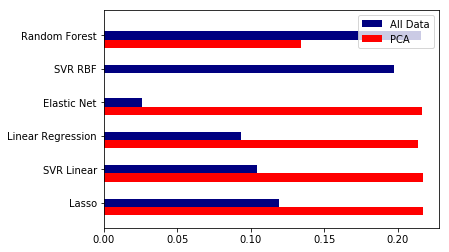

In [98]:
df = pd.DataFrame(dict(graph=['Lasso', 'SVR Linear', 'Linear Regression', 'Elastic Net', 'SVR RBF', 'Random Forest'],
                           m=[r2_svr_lin_PCA, r2_lasso_PCA, r2_linreg_PCA, r2_net_PCA, 0,  r2_rf_PCA], 
                           n=[r2_lasso, r2_svr_lin, r2_linreg, r2_net,r2_svr_rbf, r2_rf])) 

ind = np.arange(len(df))
width = 0.25

fig, ax = plt.subplots()
ax.barh(ind + width, df.n, width, color='navy', label='All Data')
ax.barh(ind, df.m, width, color='red', label='PCA')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

### Intersect with Christie's Gene List

---

In [21]:
christie_lst_pd = pd.read_csv('datasets_498/christie_lst.txt', sep ="\t", names=["Symbol"]) 
christie_lst_pd.head()

,Symbol
0,YWHAB
1,ZEB1
2,XRCC4
3,XPG
4,XPC


In [22]:
entrez_pd = pd.read_csv('../EntrezID.txt', skiprows = [0], sep ="\t", names = ["Hugo", "Symbol", "Entrez_ID"]) 
entrez_pd.head(n=5)

,Hugo,Symbol,Entrez_ID
0,HGNC:5,A1BG,1.0
1,HGNC:37133,A1BG-AS1,503538.0
2,HGNC:24086,A1CF,29974.0
3,HGNC:6,A1S9T~withdrawn,NaN
4,HGNC:7,A2M,2.0


In [23]:
entrez_id_lst = []
for symbol in christie_lst_pd["Symbol"]:
    entrez_index = entrez_pd.index[entrez_pd['Symbol'] == symbol].tolist()
    if entrez_index != []:
        entrez_ID = entrez_pd.get_value(entrez_index[0], "Entrez_ID")
        entrez_id_lst.append(int(entrez_ID))
    else:
        entrez_id_lst.append([])
christie_lst_pd["Entrez_ID"] = entrez_id_lst
christie_lst_pd.head()

,Symbol,Entrez_ID
0,YWHAB,7529
1,ZEB1,6935
2,XRCC4,7518
3,XPG,[]
4,XPC,7508


In [24]:
exp_cn_trans_pd.head()

,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
1,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
503538,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
29974,-0.4928,-0.0025,-0.0522,-0.3050,0.0436,0.1438,-0.3561,-0.1415,-0.3390,-0.1974,...,-0.1827,-0.1941,0.2785,0.0867,0.1208,0.2966,-0.9912,-0.1204,0.0398,0.1423
2,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203
144571,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203


In [25]:
index_lst = [i for [i] in exp_cn_trans_pd.index]
intersection_values = np.intersect1d(index_lst, christie_lst_pd)
# intersection_auc = np.intersect1d(auc.flatten(), entrez_lst)
# intersect auc is blank

In [28]:
exp_cn_intersect_trans_pd = exp_cn_trans_pd.loc[intersection_values,:]
exp_cn_intersect_trans_pd.head()

,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
25,0.389700,-0.041000,-0.325400,-0.292000,0.05290,0.35750,0.41250,-0.024900,-0.275800,-6.159300,...,-0.259700,0.157600,0.292100,0.004100,0.66640,0.24710,0.17470,0.045000,-0.064500,-0.233000
25,9.472142,8.767151,9.143142,9.291325,9.92596,10.12550,10.03286,8.930096,8.205374,5.031099,...,9.735289,9.694009,9.211262,9.121944,9.75457,10.89537,10.01469,9.311114,7.830865,9.022982
142,0.064700,0.500200,-0.285600,0.326200,0.54400,0.17220,-0.37350,-0.004100,0.225400,0.487800,...,0.791700,-0.295900,0.071300,0.040500,0.04340,-0.10840,0.16070,0.322500,1.286800,0.870100
142,10.455660,12.095980,10.052000,11.814330,10.97239,10.96149,10.50892,10.341620,10.521600,10.651430,...,11.746290,10.966320,10.230520,10.595540,11.09457,10.09360,10.45033,10.933630,10.237110,11.909750
207,-0.012500,-0.080600,-0.153100,-0.349000,-0.86360,-0.72040,0.06590,-0.155000,-0.349200,-0.837000,...,-0.302900,-0.299700,-0.111400,0.017500,0.04770,0.57370,0.18360,-0.505800,0.377300,0.363500


In [29]:
exp_cn_intersect_pd = exp_cn_intersect_trans_pd.transpose()
exp_cn_intersect = exp_cn_intersect_pd.as_matrix()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(exp_cn_intersect, auc, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()
pca = PCA(n_components=50)
pca.fit(x_train)    
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print "Amount of Variance explained by each component: ", pca.explained_variance_ratio_
print "Total Variance Captured", np.sum(pca.explained_variance_ratio_)

Amount of Variance explained by each component:  [ 0.16997903  0.09181478  0.03833293  0.03695322  0.02820925  0.02539975
  0.02312293  0.02192997  0.0200216   0.01854654  0.01692081  0.01615114
  0.01500561  0.01452281  0.01344548  0.01319051  0.01227281  0.011138
  0.01068892  0.0102964   0.00966734  0.00946558  0.00913441  0.00867273
  0.00822284  0.0078721   0.0076407   0.00741241  0.0073696   0.00684663
  0.00666374  0.00637937  0.00635531  0.00613459  0.00598216  0.00577389
  0.00563128  0.00543544  0.00530777  0.0051216   0.00504566  0.00480968
  0.0047643   0.00456167  0.00442525  0.00432081  0.00421994  0.00417275
  0.00405556  0.00388033]
Total Variance Captured 0.793287936574


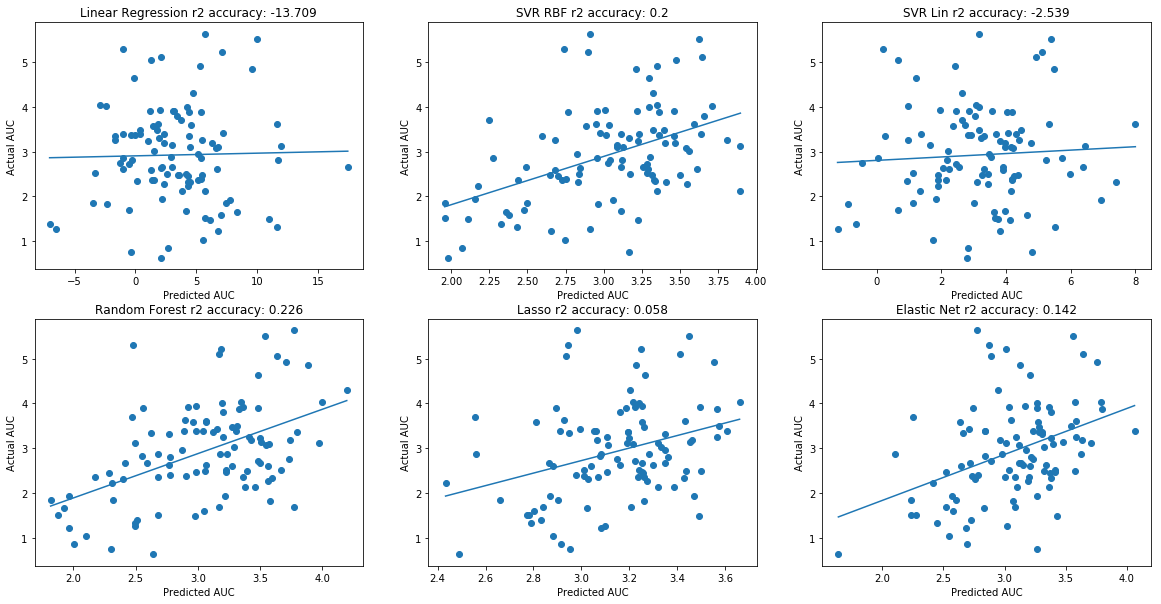

In [35]:
# calculated r_2 values
y_pred_linreg_christie, r2_linreg_christie = test_model (linreg)
y_pred_svr_rbf_christie, r2_svr_rbf_christie = test_model (svr_rbf)
y_pred_svr_lin_christie, r2_svr_lin_christie = test_model (svr_lin)
y_pred_rf_christie, r2_rf_christie = test_model (rf)
y_pred_lasso_christie, r2_lasso_christie = test_model (lasso)
y_pred_net_christie, r2_net_christie = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg_christie, "Linear Regression", r2_linreg_christie)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf_christie, "SVR RBF", r2_svr_rbf_christie)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin_christie, "SVR Lin", r2_svr_lin_christie)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf_christie, "Random Forest", r2_rf_christie)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_christie, "Lasso", r2_lasso_christie)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_christie, "Elastic Net", r2_net_christie)

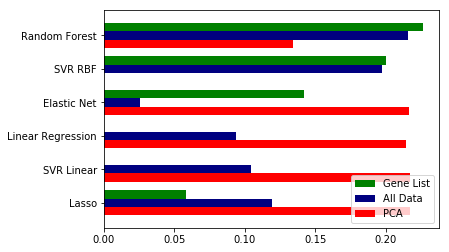

In [101]:
df = pd.DataFrame(dict(graph=['Lasso', 'SVR Linear', 'Linear Regression', 'Elastic Net', 'SVR RBF', 'Random Forest'],
                           m=[r2_svr_lin_PCA, r2_lasso_PCA, r2_linreg_PCA, r2_net_PCA,0,  r2_rf_PCA], 
                           p=[r2_lasso_christie, 0, 0, r2_net_christie,r2_svr_rbf_christie, r2_rf_christie],
                           n=[r2_lasso, r2_svr_lin, r2_linreg, r2_net,r2_svr_rbf, r2_rf])) 

ind = np.arange(len(df))
width = 0.25

fig, ax = plt.subplots()
ax.barh(ind+ width*2, df.p, width, color='green', label='Gene List')
ax.barh(ind + width, df.n, width, color='navy', label='All Data')
ax.barh(ind, df.m, width, color='red', label='PCA')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

### Intersect with David's Gene List

---

In [47]:
file_name = "datasets_498/gene_lst_pd"
file_object = open(file_name,'r')  
gene_lst_pd = pickle.load(file_object)
entrez_lst = np.array(gene_lst_pd["Entrez_id"])

In [48]:
index_lst = [i for [i] in exp_cn_trans_pd.index]
intersection_values = np.intersect1d(index_lst, entrez_lst)
intersection_auc = np.intersect1d(auc.flatten(), entrez_lst)

In [49]:
exp_cn_intersect_trans_pd = exp_cn_trans_pd.loc[intersection_values,:]
exp_cn_intersect_trans_pd.head()

,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
142,0.064700,0.500200,-0.285600,0.32620,0.54400,0.172200,-0.373500,-0.004100,0.225400,0.487800,...,0.791700,-0.295900,0.071300,0.040500,0.043400,-0.108400,0.160700,0.322500,1.28680,0.87010
142,10.455660,12.095980,10.052000,11.81433,10.97239,10.961490,10.508920,10.341620,10.521600,10.651430,...,11.746290,10.966320,10.230520,10.595540,11.094570,10.093600,10.450330,10.933630,10.23711,11.90975
207,-0.012500,-0.080600,-0.153100,-0.34900,-0.86360,-0.720400,0.065900,-0.155000,-0.349200,-0.837000,...,-0.302900,-0.299700,-0.111400,0.017500,0.047700,0.573700,0.183600,-0.505800,0.37730,0.36350
207,8.724103,8.764409,9.049873,9.03498,7.64618,8.502084,8.990039,7.110089,7.861933,8.239972,...,7.710581,7.222625,8.342761,8.857367,8.661978,9.694582,9.064321,8.092056,9.40538,10.30875
317,-0.008300,0.455700,-0.248500,0.26840,0.04150,0.082100,0.026700,-0.123400,0.225600,-0.140100,...,-0.149300,-0.252900,-0.052700,0.036400,0.064600,0.206200,0.155600,-0.000700,-0.06940,0.13750


In [50]:
exp_cn_intersect_pd = exp_cn_intersect_trans_pd.transpose()
exp_cn_intersect = exp_cn_intersect_pd.as_matrix()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(exp_cn_intersect, auc, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()
pca = PCA(n_components=50)
pca.fit(x_train)    
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print "Amount of Variance explained by each component: ", pca.explained_variance_ratio_
print "Total Variance Captured", np.sum(pca.explained_variance_ratio_)

Amount of Variance explained by each component:  [ 0.12673612  0.08145182  0.06631468  0.04492885  0.04294762  0.02885218
  0.02764816  0.0257217   0.02399443  0.02309992  0.02146368  0.02097849
  0.0187048   0.01839407  0.01615147  0.01537174  0.01369769  0.0130754
  0.01248631  0.0115982   0.01123443  0.01072639  0.01005073  0.00998993
  0.00962065  0.0088579   0.00800308  0.00773333  0.00763924  0.00745562
  0.00730545  0.00695434  0.00667212  0.00638848  0.0062839   0.00603375
  0.00592298  0.00562623  0.00554448  0.00540119  0.00510118  0.0050417
  0.0049155   0.00478766  0.00458662  0.00451098  0.00439     0.00424802
  0.0041256   0.00408131]
Total Variance Captured 0.852850089572


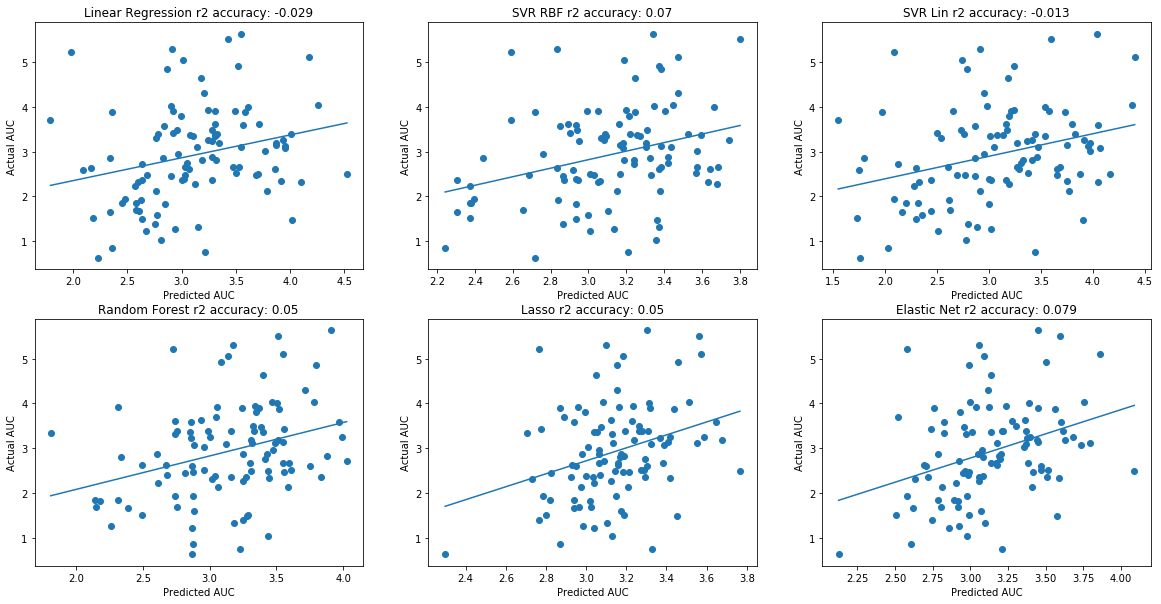

In [60]:
# calculated r_2 values
y_pred_linreg_PCA, r2_linreg_PCA = test_model_pca (linreg)
y_pred_svr_rbf_PCA, r2_svr_rbf_PCA = test_model_pca (svr_rbf)
y_pred_svr_lin_PCA, r2_svr_lin_PCA = test_model_pca (svr_lin)
y_pred_rf_PCA, r2_rf_PCA = test_model_pca (rf)
y_pred_lasso_PCA, r2_lasso_PCA = test_model_pca (lasso)
y_pred_net_PCA, r2_net_PCA = test_model_pca (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg_PCA, "Linear Regression", r2_linreg_PCA)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf_PCA, "SVR RBF", r2_svr_rbf_PCA)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin_PCA, "SVR Lin", r2_svr_lin_PCA)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf_PCA, "Random Forest", r2_rf_PCA)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_PCA, "Lasso", r2_lasso_PCA)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_PCA, "Elastic Net", r2_net_PCA)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(exp_cn_intersect, auc, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

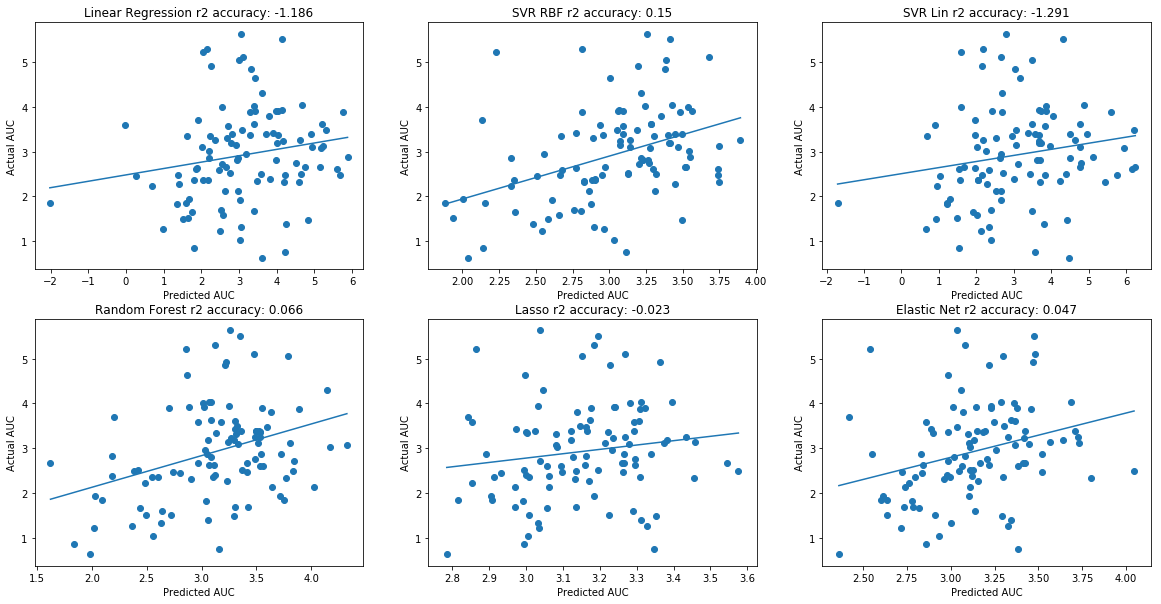

In [54]:
# calculated r_2 values
y_pred_linreg, r2_linreg = test_model (linreg)
y_pred_svr_rbf, r2_svr_rbf = test_model (svr_rbf)
y_pred_svr_lin, r2_svr_lin = test_model (svr_lin)
y_pred_rf, r2_rf = test_model (rf)
y_pred_lasso, r2_lasso = test_model (lasso)
y_pred_net, r2_net = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg, "Linear Regression", r2_linreg)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf, "SVR RBF", r2_svr_rbf)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin, "SVR Lin", r2_svr_lin)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf, "Random Forest", r2_rf)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso, "Lasso", r2_lasso)
ax[1,2] = draw_plot (ax[1,2], y_pred_net, "Elastic Net", r2_net)

In [55]:
score_df = pd.DataFrame({'Linear Regression': [r2_linreg, r2_linreg_PCA],
                         'SVM RBF': [r2_svr_rbf, r2_svr_rbf_PCA],
                         'SVM Linear': [r2_svr_lin, r2_svr_lin_PCA],
                         'Random Forest': [r2_rf,r2_rf_PCA],
                         'Lasso': [r2_lasso, r2_lasso_PCA],
                         'Net': [r2_net, r2_net_PCA]}, 
                       index=["All", "PCA"])
score_df

,Lasso,Linear Regression,Net,Random Forest,SVM Linear,SVM RBF
All,-0.022617,-1.186483,0.046705,0.065920,-1.290922,0.149690
PCA,0.049888,-0.029048,0.079459,0.007032,-0.013390,0.070251


In [56]:
print copynum_values_pd.shape
print geneexp_values_pd.shape
print exp_cn_intersect_trans_pd.shape
print exp_cn_trans_pd.shape

(23174, 498)
(18543, 498)
(216, 498)
(41717, 498)


## Tuning

---

In [102]:
param_lst = {"rf": {"n_estimators": range(10, 30)}} 
#              "svr_rbf": {"C": [1, 10, 100, 1000], "gamma": [10**(-2), 10**(-1)]}, 
#              "svr_lin": {"C": [1, 10, 100, 1000], "gamma": [10**(-2), 10**(-1)]}}
algo_lst = ["rf"]
#             , "svr_rbf", "svr_lin"

In [74]:
num_trials_outer = 3
num_trials_inner = 5
r2_rf, r2_svr_rbf, r2_svr_lin = [], [], []
for outerMCCV in range(num_trials_outer):
    out_x_train, out_x_test, out_y_train, out_y_test = train_test_split(exp_cn, auc, test_size=0.2, random_state=42)
    out_y_train = out_y_train.flatten()
    out_y_test = out_y_test.flatten()
    param_outer, score_outer = {"rf": [], "svr_rbf": [], "svr_lin": []}, {"rf": [], "svr_rbf": [], "svr_lin": []}
    param_inner, score_inner = {"rf": [], "svr_rbf": [], "svr_lin": []}, {"rf": [], "svr_rbf": [], "svr_lin": []}
    for innerMCCV in range(num_trials_inner):
        in_x_train, in_x_test, in_y_train, in_y_test = train_test_split(out_x_train, out_y_train, test_size=0.2, random_state=42)
        for algo in algo_lst:
            if algo == "rf":
                clf = RandomForestRegressor()
            if algo == "svr_rbf":
                clf = SVR(kernel = "rbf")
            if algo == "svr_lin":
                clf = SVR(kernel = "linear")
            grid = GridSearchCV(clf, param_grid=param_lst[algo], cv=5)
            grid.fit(in_x_train, in_y_train)
            results = grid.cv_results_
            best_fit = np.argmax(results.get("mean_test_score"))
            r2 = results.get("mean_test_score")
            get_params = results.get("params")[best_fit]
            param_inner[algo].append([get_params])
            score_inner[algo].append([r2])
            print algo, r2
    for algo in algo_lst:
        score_outer[algo] = list(map(lambda x: np.mean(x), score_inner[algo]))
    print score_outer
    for algo in algo_lst:
        best_case = np.argmax(score_outer[algo])
        param_outer[algo] = list(map(lambda x: x, param_inner[algo][best_case]))
        print param_outer
        if algo == "rf":
            clf = RandomForestRegressor(n_estimators = param_outer[algo][0]["n_estimators"])
        if algo == "svr_rbf":
            clf = SVR(kernel = "rbf", C = param_outer[algo][0]["C"], gamma = param_outer[algo][0]["gamma"])
        if algo == "svr_lin":
            clf = SVR(kernel = "linear", C = param_outer[algo][0]["C"], gamma = param_outer[algo][0]["gamma"])
        clf.fit(out_x_train, out_y_train)
        r2 = clf.score(out_x_test, out_y_test)
        if algo == "rf":
            r2_rf.append(r2)
        if algo == "svr_rbf":
            r2_svr_rbf.append(r2)
        if algo == "svr_lin":
            r2_svr_lin.append(r2)
print "rf :", np.average(r2_rf)
print "svr rbf :", np.average(r2_svr_rbf)
print "svr lin :", np.average(r2_svr_lin)

rf [-0.10706411 -0.03111661  0.01471121 -0.07747358  0.02886044 -0.01181645
  0.07158769  0.03391103  0.06229871 -0.00030192  0.0500467   0.04490222
  0.05299523  0.10119144  0.05851229]
rf [-0.09345219 -0.0694763   0.00948905  0.00356701  0.03023394 -0.03835316
  0.0394435   0.06515631  0.02332168  0.00547854  0.05977058  0.04168548
  0.02567658  0.06185041  0.06755916]
rf [-0.05304998 -0.096185   -0.06911486 -0.02309226  0.00738441  0.01012262
  0.02597233  0.08542105  0.06842141  0.07102605 -0.01215595  0.06355041
  0.03796595  0.03940034  0.07355557]
rf [-0.04972179 -0.07907364 -0.01208043 -0.01393421  0.01128722  0.00371154
  0.01271378  0.06889488  0.02897481  0.04036623 -0.00084542  0.09040595
  0.0540311   0.07559865  0.03411613]
rf [ -1.06250455e-01  -1.13111289e-01  -9.58254595e-02  -9.05236587e-02
   2.66217447e-02   7.49384707e-05   6.17528469e-02   1.76875680e-02
   4.53342073e-02   1.80176882e-02   8.29378898e-02   5.62440628e-02
   3.17415855e-02   6.75071151e-02   5.403